In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('yelp_data.csv')

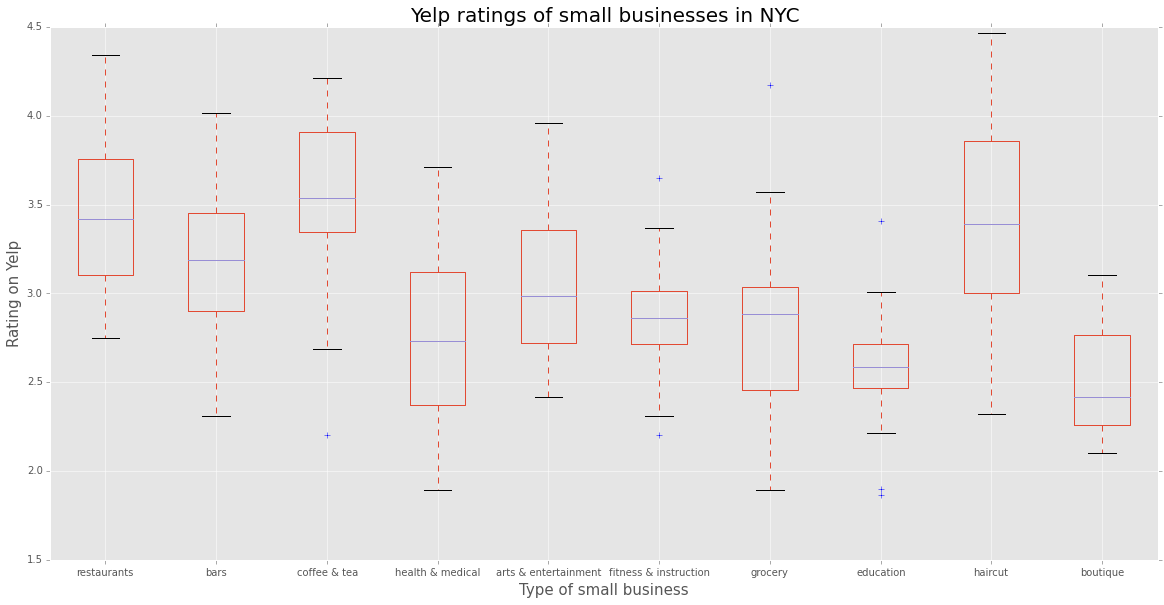

In [5]:
plt.figure(figsize=(16, 8))
ticks = df.columns.tolist()
ticks.pop(0)
ticks.pop(-1)
df.boxplot(ticks);
plt.tight_layout()
plt.title('Yelp ratings of small businesses in NYC', fontsize=20)
plt.ylabel('Rating on Yelp', fontsize=15)
plt.xlabel('Type of small business', fontsize=15)

In [6]:
df_dist = pd.DataFrame(columns=['Neighborhood1','Neighborhood2','Cosine_Distance','Similarity'])
count = 0
for i in df.index:
    nh1 = df.iloc[i].tolist()
    nh1.pop(-1)
    name1 = nh1.pop(0)
    for j in df.index:
        if not j==i:
            count += 1
            nh2 = df.iloc[j].tolist()
            nh2.pop(-1)
            name2 = nh2.pop(0)
            row = [name1,name2,distance.cosine(nh1,nh2),1-distance.cosine(nh1,nh2)]
            df_dist.loc[count] = row
df_dist

,Neighborhood1,Neighborhood2,Cosine_Distance,Similarity
1,Upper West Side,Stuyvesant Town,0.005539,0.994461
2,Upper West Side,"SoHo, TriBeCa and Little Italy",0.011538,0.988462
3,Upper West Side,Clinton,0.002890,0.997110
4,Upper West Side,Theater District and Garment District,0.006439,0.993561
5,Upper West Side,East Harlem,0.008474,0.991526
6,Upper West Side,Washington Heights,0.009925,0.990075
7,Upper West Side,Turtle Bay,0.005420,0.994580
8,Upper West Side,Gramercy,0.012010,0.987990
9,Upper West Side,Upper East Side,0.005057,0.994943
10,Upper West Side,Greenwich Village,0.006919,0.993081


In [7]:
# normalizing the similarity score
for i in df_dist.Neighborhood1.unique():
    loc_max = max(df_dist[df_dist.Neighborhood1==i]['Similarity'])
    loc_min = min(df_dist[df_dist.Neighborhood1==i]['Similarity'])
    for j in df_dist[df_dist.Neighborhood1==i].index:
        df_dist.loc[j,'Similarity'] = (df_dist.loc[j,'Similarity']-loc_min)/(loc_max-loc_min)
df_dist

,Neighborhood1,Neighborhood2,Cosine_Distance,Similarity
1,Upper West Side,Stuyvesant Town,0.005539,0.750328
2,Upper West Side,"SoHo, TriBeCa and Little Italy",0.011538,0.325614
3,Upper West Side,Clinton,0.002890,0.937877
4,Upper West Side,Theater District and Garment District,0.006439,0.686614
5,Upper West Side,East Harlem,0.008474,0.542548
6,Upper West Side,Washington Heights,0.009925,0.439791
7,Upper West Side,Turtle Bay,0.005420,0.758706
8,Upper West Side,Gramercy,0.012010,0.292190
9,Upper West Side,Upper East Side,0.005057,0.784444
10,Upper West Side,Greenwich Village,0.006919,0.652580


In [8]:
df.columns

Index([u'Unnamed: 0', u'restaurants', u'bars', u'coffee & tea',
       u'health & medical', u'arts & entertainment', u'fitness & instruction',
       u'grocery', u'education', u'haircut', u'boutique', u'PjAreaCode'],
      dtype='object')

In [12]:
df = df.rename(columns={'Unnamed: 0': 'Neighborhood'})
activities = df.columns.tolist()
activities.pop(-1)
# create a new dataframe to store the relative scores for each neighborhood calculated by subtracting the activity scores of its most similar neighborhood
# i.e. Financial District is most similar to Greenpoint, so subtract all the activity scores of Greenpoint from those of Financial District
df_weighted = pd.DataFrame(columns=activities)
row = -1
for i in df_dist.Neighborhood1.unique():
    j = df_dist[(df_dist.Neighborhood1==i)&(df_dist.Similarity==1.0)]['Neighborhood2']
    j = j.tolist()[0]
    row = df[df.Neighborhood==i].index.values[0]
    row_sim = df[df.Neighborhood==j].index.values[0]
    for act in activities:
        if act=='Neighborhood':
            df_weighted.loc[row,act] = i
        else:
            df_weighted.loc[row,act] = df.loc[row,act]-df.loc[row_sim,act]
df_weighted['PjAreaCode'] = df['PjAreaCode']
df_weighted

,Neighborhood,restaurants,bars,coffee & tea,health & medical,arts & entertainment,fitness & instruction,grocery,education,haircut,boutique,PjAreaCode
0,Upper West Side,0.393875,0.25,0.18625,-0.02875,0.4740132,0.20875,0.31625,-0.26625,0.385,-0.03,MN12
1,Stuyvesant Town,-0.4685,0.133,-0.1225,-0.40875,0.2775,-0.15,-0.19625,0.38,-0.1725,-0.14875,MN50
2,"SoHo, TriBeCa and Little Italy",0.43575,0.195375,0.215,0.34125,-0.1475,0.285,0.43875,0.23625,0.245,0.7425,MN24
3,Clinton,0.6383125,0.7605,0.3525,0.41625,0.8475,0.5725,0.55125,0.40375,0.69375,0.20625,MN15
4,Theater District and Garment District,1.195688,0.901875,1.32125,0.925,1.0925,0.45625,0.77,0.80625,0.86,0.556875,MN17
5,East Harlem,-1.195688,-0.901875,-1.32125,-0.925,-1.0925,-0.45625,-0.77,-0.80625,-0.86,-0.556875,MN34
6,Washington Heights,-0.1165625,-0.1997083,-0.7416071,-0.185,0.08684211,-0.20875,-0.2833333,-0.48,-0.375,-0.49375,MN35
7,Turtle Bay,0,0,0,0,0,0,0,0,0,0,MN19
8,Gramercy,0.2694375,0.20325,0.535,0.28625,0.0475,0.245,0.6344737,0.00625,0.22625,0.595,MN21
9,Upper East Side,0.18275,0.29225,0,0.5125,0.20625,-0.11375,0.16125,0.03125,0.23,-0.31125,MN40


In [13]:
rec_dict = {}
for i in df_weighted.index:
    nbhd = df_weighted.loc[i,'Neighborhood']
    loc_min = min(df_weighted.loc[i,activities[1:]].tolist())
    for act in activities[1:]:
        if df_weighted.loc[i,act]==loc_min:
            rec_dict[nbhd] = act
rec_dict

{'Bedford-Stuyvesant': 'fitness & instruction',
 'Brooklyn Heights and Cobble Hill': 'arts & entertainment',
 'Bushwick': 'haircut',
 'Carroll Gardens and Red Hook': 'coffee & tea',
 'Chelsea, Flatiron District and Union Square': 'bars',
 'Chinatown': 'fitness & instruction',
 'Clinton': 'boutique',
 'Clinton Hill': 'restaurants',
 'Crown Heights': 'grocery',
 'Downtown Brooklyn, DUMBO, Vinegar Hill and Boerum Hill': 'boutique',
 'East Harlem': 'coffee & tea',
 'East Village': 'fitness & instruction',
 'East Williamsburg': 'arts & entertainment',
 'Financial District and Battery Park City': 'boutique',
 'Fort Greene': 'boutique',
 'Gramercy': 'education',
 'Greenpoint': 'grocery',
 'Greenwich Village': 'education',
 'Harlem': 'grocery',
 'Lower East Side': 'education',
 'Morningside Heights': 'health & medical',
 'Murray Hill and Kips Bay': 'boutique',
 'Park Slope and Gowanus': 'education',
 'Prospect Heights': 'haircut',
 'SoHo, TriBeCa and Little Italy': 'arts & entertainment',
 'St

In [15]:
df_nbhd = pd.DataFrame(columns=['PjAreaCode','Neighborhood'])
df_nbhd['PjAreaCode'] = df['PjAreaCode']
df_nbhd['Neighborhood'] = df['Neighborhood']
df_rec = pd.DataFrame(list(rec_dict.iteritems()),columns=['Neighborhood','RecBiz'])
df_rec.head()

,Neighborhood,RecBiz
0,Lower East Side,education
1,Greenpoint,grocery
2,Turtle Bay,boutique
3,Upper East Side,boutique
4,Williamsburg,fitness & instruction


In [16]:
df_out = pd.merge(df_nbhd, df_rec, on=['Neighborhood'])
df_out

,PjAreaCode,Neighborhood,RecBiz
0,MN12,Upper West Side,education
1,MN50,Stuyvesant Town,restaurants
2,MN24,"SoHo, TriBeCa and Little Italy",arts & entertainment
3,MN15,Clinton,boutique
4,MN17,Theater District and Garment District,fitness & instruction
5,MN34,East Harlem,coffee & tea
6,MN35,Washington Heights,coffee & tea
7,MN19,Turtle Bay,boutique
8,MN21,Gramercy,education
9,MN40,Upper East Side,boutique


In [17]:
df_out.to_csv('recbiz_simple.csv')